In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy.linalg
import random

path = "DataScience_salaries_2024.csv"

df = pd.read_csv(path, usecols=[ 'job_title','experience_level'])
#df = pd.read_csv(path)
#df = df.dropna(axis=0, how='any')
df = df.drop_duplicates()
df

,experience_level,job_title
0,MI,Data Scientist
1,MI,BI Data Analyst
3,MI,ML Engineer
4,SE,Lead Machine Learning Engineer
6,SE,Data Science Manager
...,...,...
14751,EN,Data Analytics Manager
14800,EN,Data Quality Engineer
14818,EN,Data Analytics Engineer
14823,EN,Data Analyst Lead


In [2]:
# Chuyển đổi dataframe thành đồ thị
job_title = df['job_title']
experience_level = df['experience_level']
print("Số lượng ngành nghề:", job_title.nunique())
print("Số lượng mức độ kinh nghiệm:", experience_level.nunique())
print("Số cạnh", len(df))

Số lượng ngành nghề: 153
Số lượng mức độ kinh nghiệm: 4
Số cạnh 334


In [3]:
from networkx.algorithms import bipartite
B = nx.Graph()
for index, row in df.iterrows():
  B.add_edge(row['job_title'], row['experience_level'], weight=1)
B.add_nodes_from(job_title, bipartite=0)
B.add_nodes_from(experience_level, bipartite=1)

<Figure size 1500x1500 with 0 Axes>

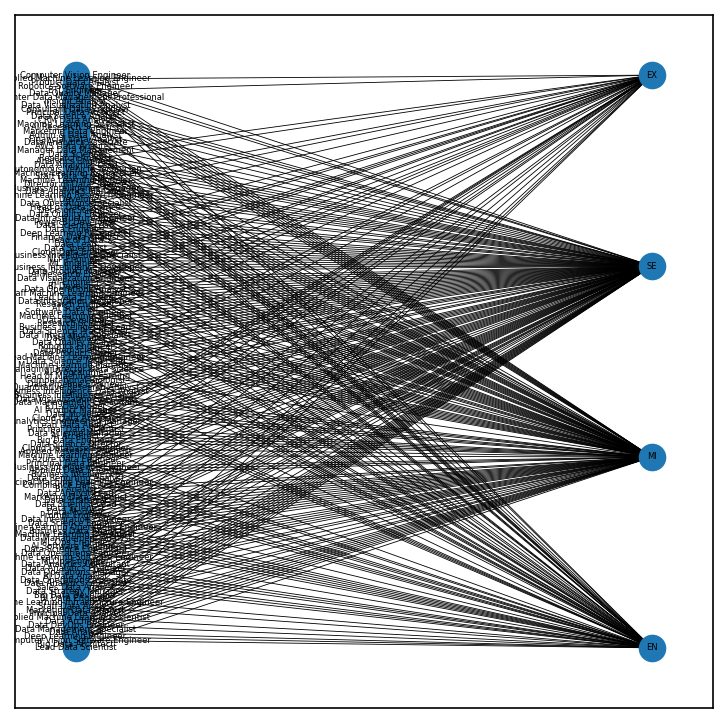

In [4]:
plt.figure(figsize=(15,15))
pos = nx.spring_layout(B, scale = 40)
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi = 150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, job_title), font_size=4, width=0.4, node_size=150)

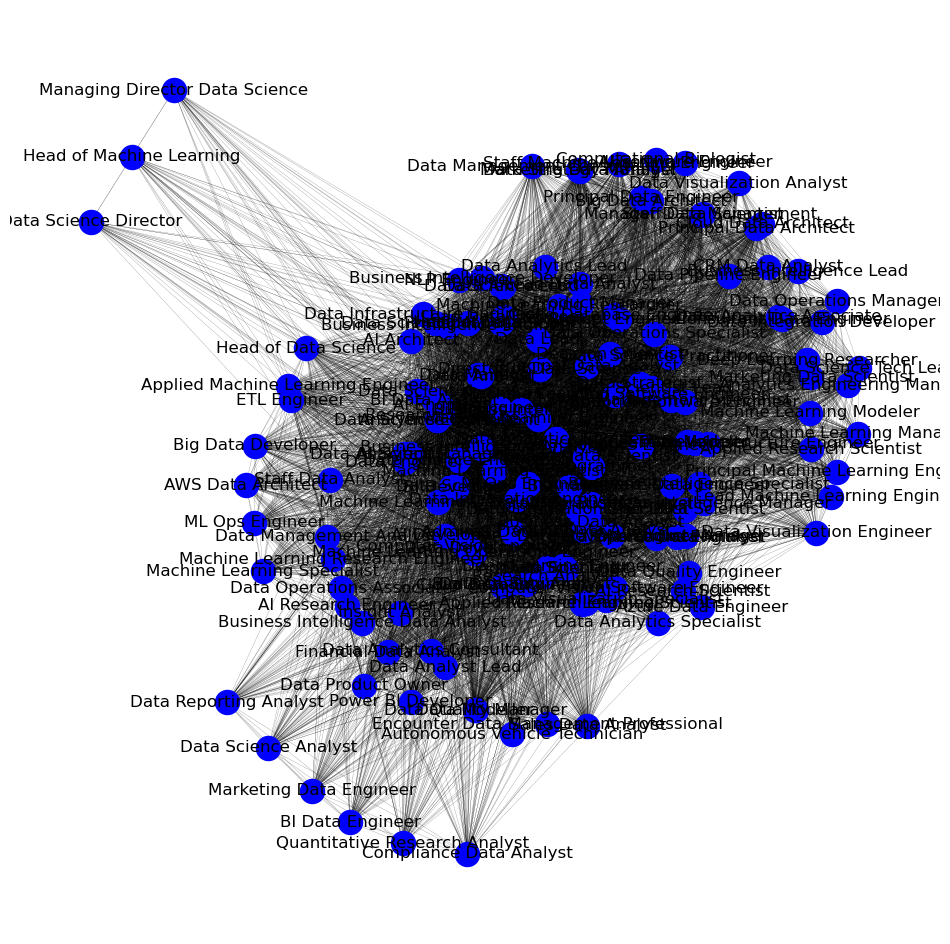

In [5]:
from networkx.algorithms import bipartite
job_title = list(set(job_title))  # Loại bỏ các phần tử trùng lặp
G = bipartite.weighted_projected_graph(B, job_title)
plt.figure(figsize=(12, 12))

layout = nx.spring_layout(G)

# Vẽ các đỉnh
nx.draw_networkx_nodes(
    G,
    layout,
    nodelist=job_title,
    node_size=300,
    node_color='blue'
)

# Vẽ các cạnh
nx.draw_networkx_edges(G, layout, width=0.1, edge_color="#000000")

# Đặt nhãn cho các đỉnh
node_labels = dict(zip(job_title, job_title))
nx.draw_networkx_labels(G, layout, labels=node_labels)

plt.axis('off')
plt.show()

In [6]:
#in đồ thị 1 phía ra file csv
labels = nx.get_edge_attributes(G,'weight')
data = [{'source': key[0], 'target': key[1], 'weight': value} for key, value in labels.items()]
df2 = pd.DataFrame(data)
df2.to_csv(r'dothi1phia_full.csv', index = False, header = True)

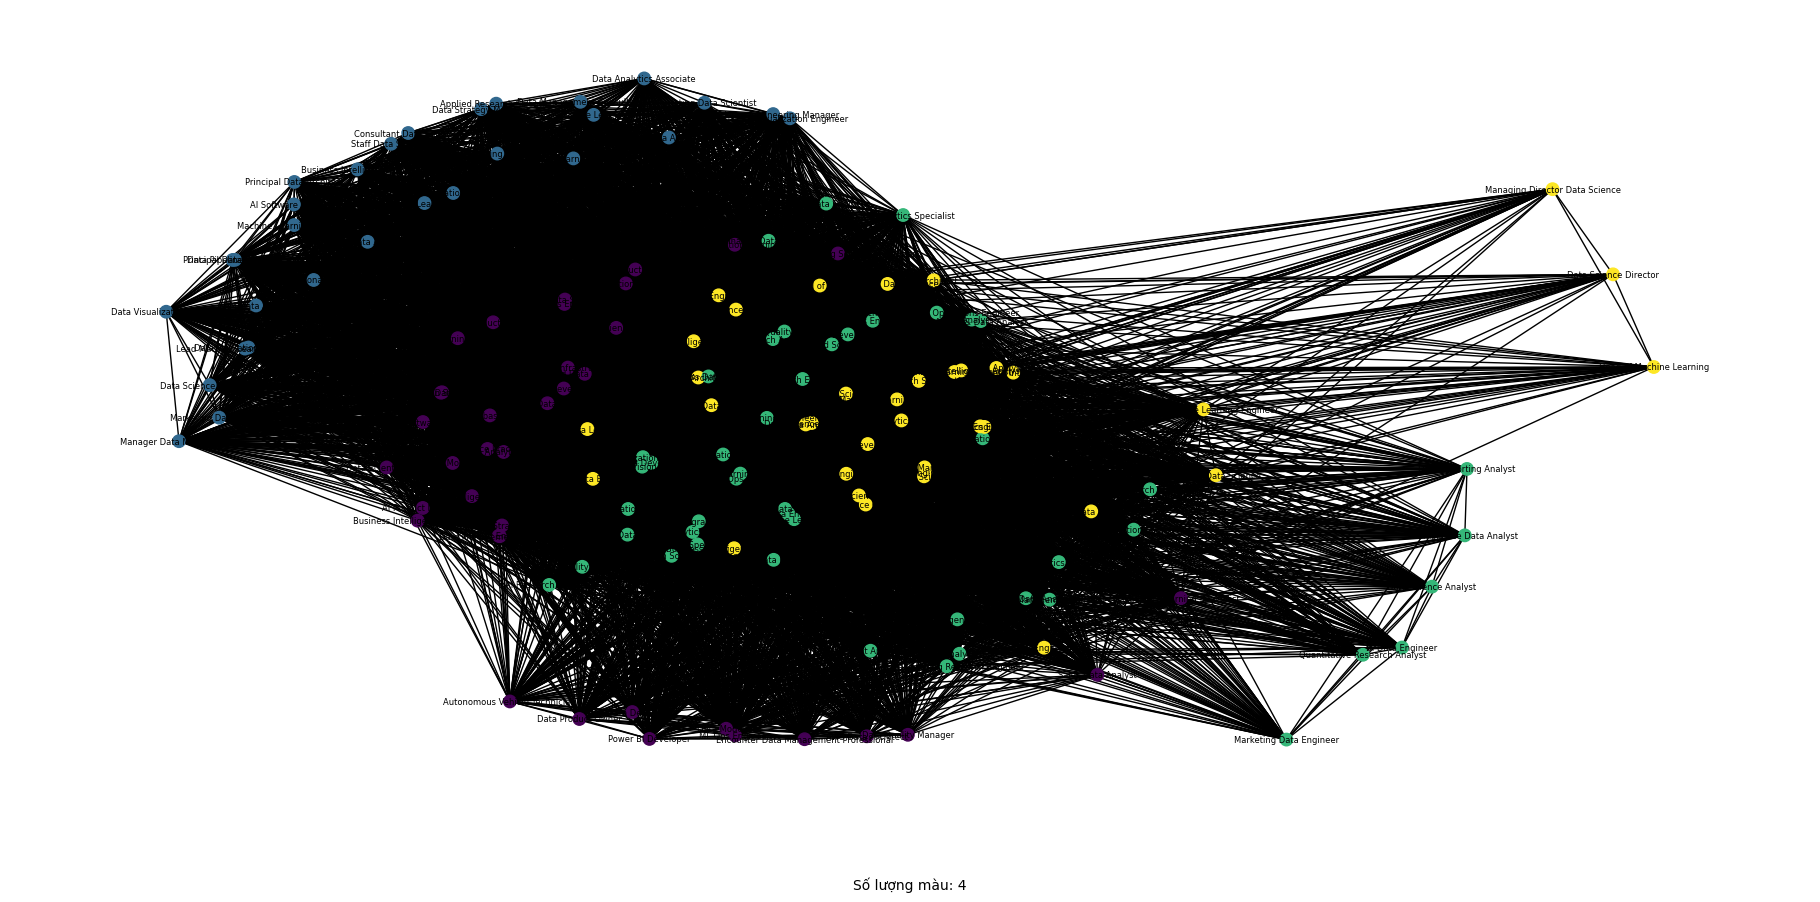

In [7]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Chạy thuật toán Louvain
partition = community_louvain.best_partition(G)

# Đếm số lượng màu sắc
num_colors = len(set(partition.values()))

# Vẽ đồ thị với màu sắc tương ứng với cộng đồng
pos = nx.spring_layout(G)
plt.figure(figsize=(18, 8))
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos=pos, node_color=colors, cmap='viridis',node_size=80, with_labels=True, font_size=6, width=1.0)

# Hiển thị số lượng màu
plt.text(0.5, -0.1, f"Số lượng màu: {num_colors}", transform=plt.gca().transAxes, ha="center")
#num_colors = min(len(set(partition.values())), 8)
# Hiển thị đồ thị
plt.show()

In [8]:
import numpy as np
values = list(partition.values())

#kt số lượng cộng đồng
print('số lượng cộng đồng: ', len(np.unique(values)))

số lượng cộng đồng:  4


In [9]:
import numpy as np
values = list(partition.values())
group = [[] for _ in range(len(np.unique(values)))]
for i in range (len(np.unique(values))):
  for name, k in partition.items():
    if k==i:
      group[i].append(name)
for data in group:
  print(data)
for i in range(len(np.unique(values))):
  value = group[i]
  filter_data = df[df['job_title'].isin(value)]
  #in ra file excel
  name = 'cum' + str(i) +'.xlsx'
  filter_data.to_excel(name, index=False)

['Lead Data Scientist', 'Data Management Specialist', 'Principal Data Analyst', 'Machine Learning Infrastructure Engineer', 'Big Data Developer', 'Sales Data Analyst', 'Machine Learning Software Engineer', 'Data Operations Engineer', 'ML Ops Engineer', 'Prompt Engineer', 'Data Modeler', 'Data Scientist Lead', 'Data Strategist', 'Cloud Database Engineer', 'Lead Data Analyst', 'Data Modeller', 'AI Product Manager', 'ETL Developer', 'Data Product Owner', 'Robotics Engineer', 'Data Science Practitioner', 'Software Data Engineer', 'Data Product Manager', 'Business Intelligence Specialist', 'Data Science Lead', 'Power BI Developer', 'Data Infrastructure Engineer', 'Decision Scientist', 'Data Operations Specialist', 'Business Intelligence Manager', 'Machine Learning Researcher', 'Autonomous Vehicle Technician', 'Data Analytics Lead', 'AWS Data Architect', 'Machine Learning Specialist', 'Encounter Data Management Professional', 'Data Quality Manager', 'Robotics Software Engineer']
['Big Data A

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


KMeans(n_clusters=3)
153


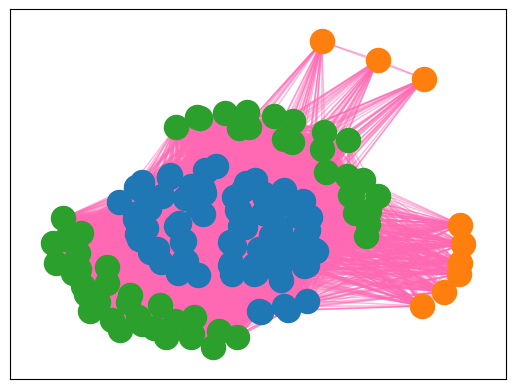

Groups:
Group 1 : ['Lead Data Scientist', 'Computer Vision Software Engineer', 'Deep Learning Engineer', 'Data Analyst', 'Data Management Specialist', 'Data DevOps Engineer', 'Data Architect', 'Applied Machine Learning Scientist', 'Principal Data Analyst', 'Machine Learning Infrastructure Engineer', 'Data Analytics Specialist', 'BI Data Analyst', 'Data Analytics Engineer', 'MLOps Engineer', 'Machine Learning Software Engineer', 'Data Operations Engineer', 'Data Science Consultant', 'Machine Learning Developer', 'Business Data Analyst', 'Machine Learning Operations Engineer', 'Data Science Engineer', 'Data Integration Engineer', 'Prompt Engineer', 'Data Modeler', 'Data Scientist', 'Data Scientist Lead', 'Data Strategist', 'BI Analyst', 'Business Intelligence', 'Applied Data Scientist', 'Business Intelligence Engineer', 'Azure Data Engineer', 'Machine Learning Engineer', 'Cloud Database Engineer', 'Big Data Engineer', 'AI Architect', 'Data Science Manager', 'Principal Data Scientist', 'L

In [10]:
from sklearn.cluster import KMeans
nodes = list(G.nodes())
edges = list(G.edges())
node_degree = [G.degree(node) for node in G.nodes()]
degree_x =[[degree] for degree in node_degree]
degree_kmeans = KMeans(n_clusters=3).fit(degree_x)
degree_labels = degree_kmeans.labels_
print(degree_kmeans)

print(len(nodes))
pos = nx.spring_layout(G)
for i in range(len(nodes)):
  node = nodes[i]
  color = degree_labels[i]
  nx.draw_networkx_nodes(G, pos, [node], node_color=plt.cm.tab10(color))
nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.5, edge_color="hotpink", node_size=100)
plt.show()

groups = {}
for node, label in zip(nodes, degree_labels):
    if label not in groups:
        groups[label] = []
    groups[label].append(node)

print("Groups:")
for label, nodes in groups.items():
    print("Group", label + 1, ":", nodes)
    value = nodes
    filter_data = df[df['job_title'].isin(value)]
    name = 'nhom' + str(label) +'.xlsx'
    filter_data.to_excel(name, index=False)

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Tính toán PageRank
pagerank = nx.pagerank(G, alpha=0.85, personalization=None)

# Sắp xếp theo giá trị PageRank giảm dần
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
top_10_job = sorted_pagerank[:10]
# Hiển thị bảng xếp hạng
print("Bảng xếp hạng PageRank:")
print("-----------------------")
print("Ngành nghề \tPageRank")
print("-----------------------")
for player, rank in top_10_job:
    print(f"{player}\t{rank}")

Bảng xếp hạng PageRank:
-----------------------
Ngành nghề 	PageRank
-----------------------
Data Analyst	0.009784357254676813
Data Science Engineer	0.009784357254676813
Data Scientist	0.009784357254676813
Business Intelligence	0.009784357254676813
Machine Learning Engineer	0.009784357254676813
BI Data Analyst	0.009784357254676811
Data Science Consultant	0.009784357254676811
Business Intelligence Analyst	0.009784357254676811
Data Manager	0.009784357254676811
Research Scientist	0.009784357254676811


In [12]:
import networkx as nx
import numpy as np

# Tính Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
top_10_eigenvector_centrality = sorted_eigenvector_centrality[:10]

# Tính Eigenvalue Centrality
adjacency_matrix = nx.adjacency_matrix(G).T.toarray()
eigenvalues, eigenvectors = np.linalg.eig(adjacency_matrix)
eigenvalue_centrality = np.abs(eigenvectors[:, 0]) / np.linalg.norm(eigenvectors[:, 0])
sorted_eigenvalue_centrality = sorted(enumerate(eigenvalue_centrality), key=lambda x: x[1], reverse=True)
top_10_eigenvalue_centrality = sorted_eigenvalue_centrality[:10]

# In kết quả Eigenvector Centrality
print("Eigenvector Centrality (10 đỉnh cao nhất):")
for node, centrality in top_10_eigenvector_centrality:
    print(f"Đỉnh {node}: {centrality}")

# In kết quả Eigenvalue Centrality
print("\nEigenvalue Centrality (10 đỉnh cao nhất):")
for i, (node, centrality) in enumerate(top_10_eigenvalue_centrality):
    print(f"Đỉnh {node+1}: {centrality}")

Eigenvector Centrality (10 đỉnh cao nhất):
Đỉnh Data Analyst: 0.08976318087920035
Đỉnh BI Data Analyst: 0.08976318087920035
Đỉnh Data Science Consultant: 0.08976318087920035
Đỉnh Data Science Engineer: 0.08976318087920035
Đỉnh Data Scientist: 0.08976318087920035
Đỉnh Business Intelligence: 0.08976318087920035
Đỉnh Machine Learning Engineer: 0.08976318087920035
Đỉnh Business Intelligence Analyst: 0.08976318087920035
Đỉnh Data Manager: 0.08976318087920035
Đỉnh Research Scientist: 0.08976318087920035

Eigenvalue Centrality (10 đỉnh cao nhất):
Đỉnh 20: 0.11951414664958655
Đỉnh 38: 0.11951414664958655
Đỉnh 132: 0.11951414664958655
Đỉnh 5: 0.11951414664958646
Đỉnh 27: 0.11951414664958646
Đỉnh 34: 0.11951414664958646
Đỉnh 47: 0.11951414664958646
Đỉnh 52: 0.11951414664958646
Đỉnh 68: 0.11951414664958646
Đỉnh 83: 0.11951414664958646


[['Lead Data Scientist', 'Big Data Architect', 'Computer Vision Software Engineer', 'Deep Learning Engineer', 'Data Analyst', 'Data Management Specialist', 'Data DevOps Engineer', 'Data Architect', 'Applied Machine Learning Scientist', 'Principal Data Analyst', 'Marketing Data Analyst', 'Staff Data Analyst', 'Machine Learning Infrastructure Engineer', 'BI Data Engineer', 'Big Data Developer', 'Data Strategy Manager', 'Sales Data Analyst', 'Data Analytics Specialist', 'Data Operations Associate', 'BI Data Analyst', 'Data Operations Manager', 'Data Analytics Engineer', 'Data Analytics Consultant', 'MLOps Engineer', 'Machine Learning Software Engineer', 'Data Operations Engineer', 'Data Science Consultant', 'AI Software Engineer', 'ML Ops Engineer', 'Data Management Analyst', 'Machine Learning Developer', 'Business Data Analyst', 'Machine Learning Operations Engineer', 'Data Science Engineer', 'Data Integration Engineer', 'Prompt Engineer', 'Data Modeler', 'Data Scientist', 'Data Scientis

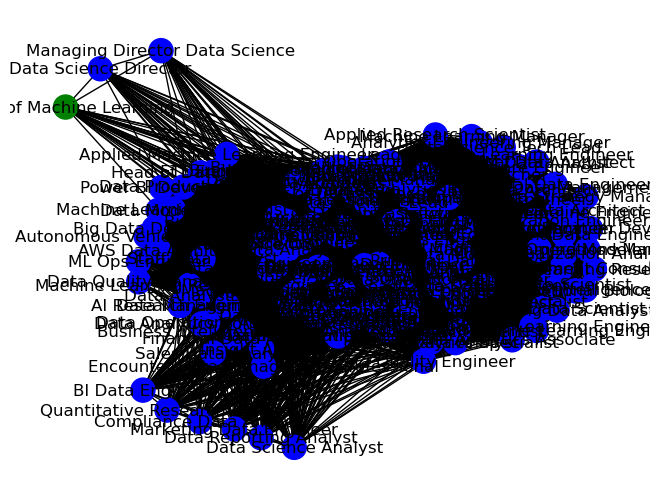

In [13]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(G)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [14]:
import networkx as nx

# Tính Betweenness Centrality cho các cạnh
betweenness = nx.edge_betweenness_centrality(G)

# Sắp xếp Betweenness Centrality theo thứ tự giảm dần
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

# Lấy 10 cạnh có Betweenness Centrality cao nhất
top_10_betweenness = sorted_betweenness[:10]

# In kết quả Betweenness Centrality
print("Bảng xếp hạng Betweenness Centrality theo Edge (10 cạnh cao nhất):")
print("---------------------------------------")
print("Edge\tBetweenness Centrality")
print("---------------------------------------")
for edge, rank in top_10_betweenness:
    print(f"{edge}\t{rank}")

Bảng xếp hạng Betweenness Centrality theo Edge (10 cạnh cao nhất):
---------------------------------------
Edge	Betweenness Centrality
---------------------------------------
('Head of Machine Learning', 'Data Manager')	0.0004013736391057635
('Head of Machine Learning', 'Research Scientist')	0.0004013736391057635
('Head of Machine Learning', 'Machine Learning Scientist')	0.0004013736391057635
('Head of Machine Learning', 'AI Scientist')	0.0004013736391057635
('Head of Machine Learning', 'ML Engineer')	0.0004013736391057635
('Managing Director Data Science', 'Data Manager')	0.0004013736391057635
('Managing Director Data Science', 'Research Scientist')	0.0004013736391057635
('Managing Director Data Science', 'Machine Learning Scientist')	0.0004013736391057635
('Managing Director Data Science', 'AI Scientist')	0.0004013736391057635
('Managing Director Data Science', 'ML Engineer')	0.0004013736391057635


In [15]:
import networkx as nx

# Tính toán Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Sắp xếp theo Betweenness Centrality giảm dần
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_10_players = sorted_betweenness[:10]
# In ra các đỉnh có Betweenness Centrality cao nhất
print("Các đỉnh có Betweenness Centrality cao nhất:")
print("-----------------------------------------")
print("Đỉnh\t\tBetweenness Centrality")
print("-----------------------------------------")

# Lặp qua từng cặp (đỉnh, giá trị) và in ra màn hình
for node, centrality in top_10_players:
    print(f"{node}\t\t{centrality}")

Các đỉnh có Betweenness Centrality cao nhất:
-----------------------------------------
Đỉnh		Betweenness Centrality
-----------------------------------------
Data Analyst		0.002494380617170938
BI Data Analyst		0.002494380617170938
Data Science Consultant		0.002494380617170938
Data Science Engineer		0.002494380617170938
Data Scientist		0.002494380617170938
Business Intelligence		0.002494380617170938
Machine Learning Engineer		0.002494380617170938
Business Intelligence Analyst		0.002494380617170938
Data Manager		0.002494380617170938
Research Scientist		0.002494380617170938


In [16]:
import pandas as pd
import operator

closeness_centrality = nx.closeness_centrality(G)

# Tạo DataFrame từ closeness centrality
data = {
    'job_title': closeness_centrality.keys(),
    'Closeness': closeness_centrality.values()
}

closeness_centrality_table = pd.DataFrame.from_dict(data)
closeness_centrality_table = closeness_centrality_table.sort_values(by=['Closeness', 'job_title'], ascending=False)

# Lọc bỏ những đỉnh có closeness centrality bằng 1
closeness_centrality_table = closeness_centrality_table[closeness_centrality_table['Closeness'] != 1]

pd.set_option('display.max_rows', 50)
closeness_centrality_table.head(10)



,job_title,Closeness
91,Research Engineer,0.980645
130,Research Analyst,0.980645
150,Product Data Analyst,0.980645
32,Machine Learning Operations Engineer,0.980645
30,Machine Learning Developer,0.980645
23,MLOps Engineer,0.980645
3,Deep Learning Engineer,0.980645
66,Data Visualization Specialist,0.980645
106,Data Specialist,0.980645
81,Data Quality Analyst,0.980645


In [17]:
import networkx as nx

# Tính số cạnh
num_edges = G.number_of_edges()

# Tính số nút
num_nodes = G.number_of_nodes()

# In ra kết quả
print(f"Số cạnh của đồ thị là: {num_edges}")
print(f"Số nút của đồ thị là: {num_nodes}")

Số cạnh của đồ thị là: 9998
Số nút của đồ thị là: 153
